# Crime Rate

## Introduction

I chose the crime rate of each neighborhood as my metric because I believe safety is of paramount importance to individuals and families alike. In order to deem a neighborhood good, I believe that the residents of said neighborhood must feel safe and protected in their homes and on the street. Higher crime rates within a community have been shown to have negative health effects on the members of that community. For example, people who fear their neighborhood is high in crime will less likely choose to partake in physical activity that could potentially put them in harm's way. Also, trauma related to witnessing crime, especially in children, is obviously much higher in high-crime neighborhoods, which can have lasting effects throughout a person's life. Overall, a high-crime neighborhood brings a host of mental, physical, and, psychological problems that are not present within the confines of a low-crime neighborhood. 

### Part One

In this section, I imported all my necessary tools required throughout my part of the project. I then input the .csv file and read it in using the "neighborhood" column as the index column. Also, I had to filter out a lot of the columns in order to get the relevant data in an orderly chart that was easily readable. Then, I sorted the "overall_crime_rates" values from least to greatest, as the lowest crime rate is desirable, compared to the highest. I used geopandas to read the map file into the notebook and finally changed a few names of neighborhoods that were listed slightly different than those on the map. 

In [1]:
import pandas as pd
import numpy as np
import math
%matplotlib inline
import matplotlib.pyplot as plt
import geopandas



crime_rate_csv = "arrests-for-major-crimes.csv"
data = pd.read_csv(crime_rate_csv, index_col = "neighborhood")

data = data.filter(['population','overall_crime_rate' ])
data.sort_values(by = "overall_crime_rate", ascending = True)


neighborhoods = geopandas.read_file("neighborhoods/Neighborhoods_.shp")

data.rename(index = {'Lawrenceville':'Central Lawrenceville', 'Crafton Heights - Westwood - Oakwood':'Crafton Heights',
                     'Hazelwood-Glenwood-Glen Hazel' : 'Hazelwood', 'Lower Oakland' : 'South Oakland', 'Mount Washington - Duquesne Heights' :
                     'Mount Washington', 'Ridgemont - Chicken Hill' : 'Ridgemont', 'Sheraton Chartiers' : 'Sheradon', 
                     'Southside Flats' : 'South Side Flats', 'Southside Slopes' : 'South Side Slopes', 'Spring Hill' :
                     'Spring Hill-City View', 'The Strip' : 'Strip District', '31st Ward':'Hays', 'West End Valley' : 'West End',
                     'Squirrel Hill - North of Forbes' : 'Squirrel Hill North', 'Squirrel Hill - South of Forbes' : 
                     'Squirrel Hill South', 'The Bluff' : 'Bluff', 'Harpen Hilltop' : 'Summer Hill',
                     'California Ave.' : 'California-Kirkbride', 'Shadeland Halls Grove' : 'Marshall-Shadeland',
                     'North View Heights' : 'Northview Heights', 'Central North Side':'Central Northside',
                     'East North Side' : 'East Allegheny','Elliot' : 'Elliott','Sheraton Chartiers':'Sheraden'}, inplace = True)

### Part Two

In this section, I grouped the data by nieghborhood and retrieved the crime rate for each. Then, I sorted the 20 lowest values from least to greatest and graphed them on a bar graph. Finally, I printed the data in a simple chart in order to read the graph better. The bar graph shows how small the margin of difference is in many neighborhoods; this shows there could be an argument made for multiple neighborhoods, as the top 20 are all within a 1.51 difference of each other. 

neighborhood
Summer Hill            0.99
Crafton Heights        1.41
Morningside            1.61
Brighton Heights       1.64
Elliott                1.70
Swisshelm Park         1.72
Troy Hill              1.78
Marshall-Shadeland     1.79
Upper Lawrenceville    1.80
East Carnegie          1.82
South Side Slopes      1.82
Perry North            1.84
Brookline              1.91
Banksville             1.94
Sheraden               1.96
Carrick                1.98
Beechview              1.98
Hays                   2.03
Greenfield             2.38
Arlington              2.50
Name: overall_crime_rate, dtype: float64


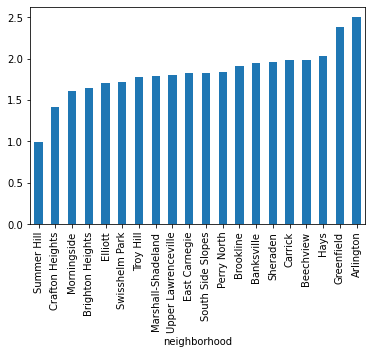

In [2]:
data2 = data.groupby("neighborhood").sum()["overall_crime_rate"]
data2.sort_values(ascending = True).head(20).plot(kind = "bar")
print(data2.sort_values(ascending = True).head(20))

#### Part Three

Here, I created a map using the entirety of the csv file; some neighborhoods were did not have any data to graph. The map is useful to see crime-concentrated areas, and see how crime rates are around the entirety of Pittsburgh and its surrounding neighborhoods. Also, you can see how similarly low the crime rate is in many neighborhoods, so the small margins between neighborhood crime rates are displayed well in a map. 

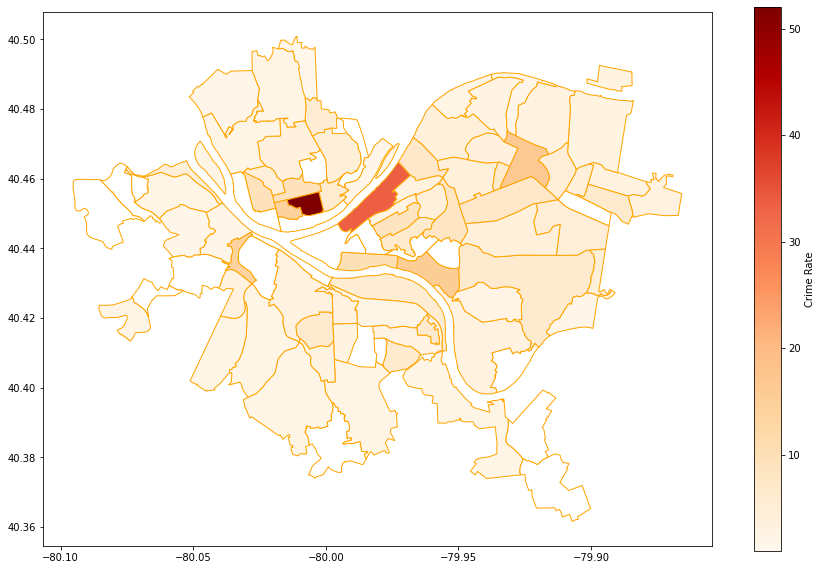

In [4]:
crime_rate_map = neighborhoods.merge(data2, how = 'left', left_on = 'hood', right_on = 'neighborhood')
crime_rate_map.plot(column = 'overall_crime_rate', cmap = 'OrRd', edgecolor = "orange", legend = True,
                   legend_kwds={'label': "Crime Rate"}, figsize = (15,10), missing_kwds = {"color": "white"})

## Conclusion

According to the data I retrieved, sorted through, and displayed, Summer Hill is the best neighborhood according to my metric. Its crime rate of .99 beat out the second-lowest neighborhood, Crafton Heights, by .42. Even though the data is in favor of Summer Hill, I think an argument couldbe made for any of the top 18 neighborhoods. They were all within an extremely close margin of one another and the crime rate is below 2, which is low among any standard. The highest-crime neighborhood with available data was Allegheny Center, with a rate of 52.04; however, this data could be skewed considering it is located near downtown Pittsburgh and also has a very low population, since most of the county is home to commercial buildings. 